# Test pattern extraction with RIPDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from tqdm import tqdm

from ripdalib.main import ripda, ripda_bis
from ripdalib.plot import plot_ripda, plot_ripda_bis

from dataset.utils import load_pickle_data

In [2]:
DATA_FILE = "./pop909_0005.pkl"
INSTRUMENTS = ("MELODY", "BRIDGE", "PIANO")

STEP = 1

In [3]:
data = load_pickle_data(DATA_FILE)

In [4]:
print(data.keys())

dict_keys(['163', '336', '203', '220', '602', '542', '047', '371', '603', '799', '841', '878', '473', '556', '038', '871', '480', '228', '784', '862', '261', '533', '337', '358', '043', '128', '314', '793', '447', '761', '340', '611', '034', '343', '273', '342', '534', '467', '835', '151', '319', '050', '338', '135', '386', '635', '516', '903', '108', '433', '234', '785', '098', '553', '830', '264', '267', '330', '383', '136', '138', '028', '589', '815', '558', '477', '212', '562', '598', '033', '345', '385', '451', '545', '847', '564', '687', '026', '153', '155', '329', '481', '811', '196', '051', '906', '074', '091', '571', '200', '258', '327', '760', '162', '488', '745', '088', '401', '274', '076', '355', '730', '160', '904', '877', '156', '168', '427', '085', '743', '842', '207', '150', '167', '593', '179', '328', '759', '189', '605', '292', '248', '346', '344', '143', '728', '908', '170', '144', '394', '159', '614', '246', '129', '204', '566', '041', '262', '445', '288', '539', '4

## RIPDA

In [5]:
test = list(data.keys())[1]

patterns = ripda(data[test]["PIANO"], L_list=(2,4,6,8,10,12,16,20,24,28,32))#Lmax=32, step=STEP)

In [6]:
print(len(patterns))

11


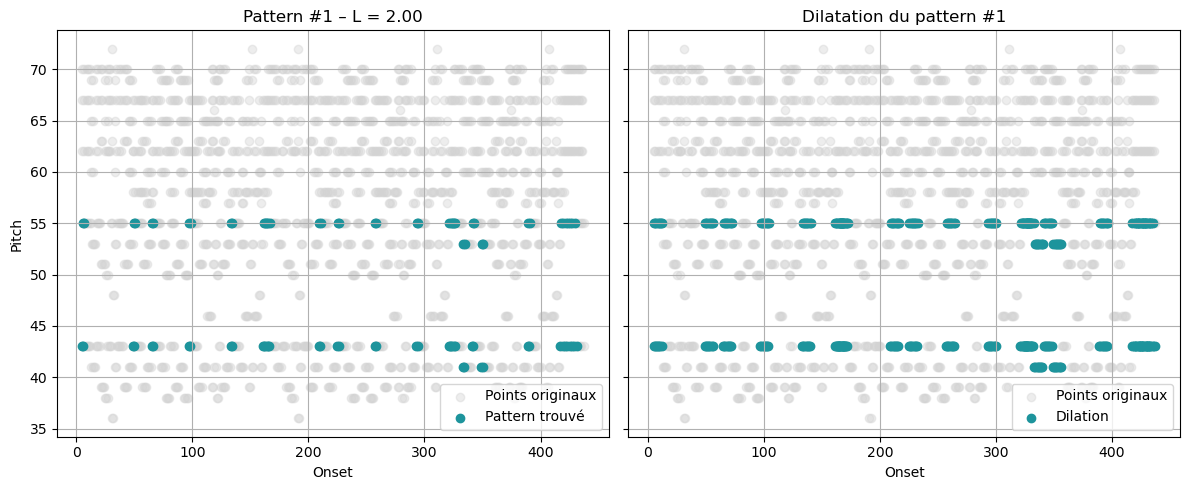

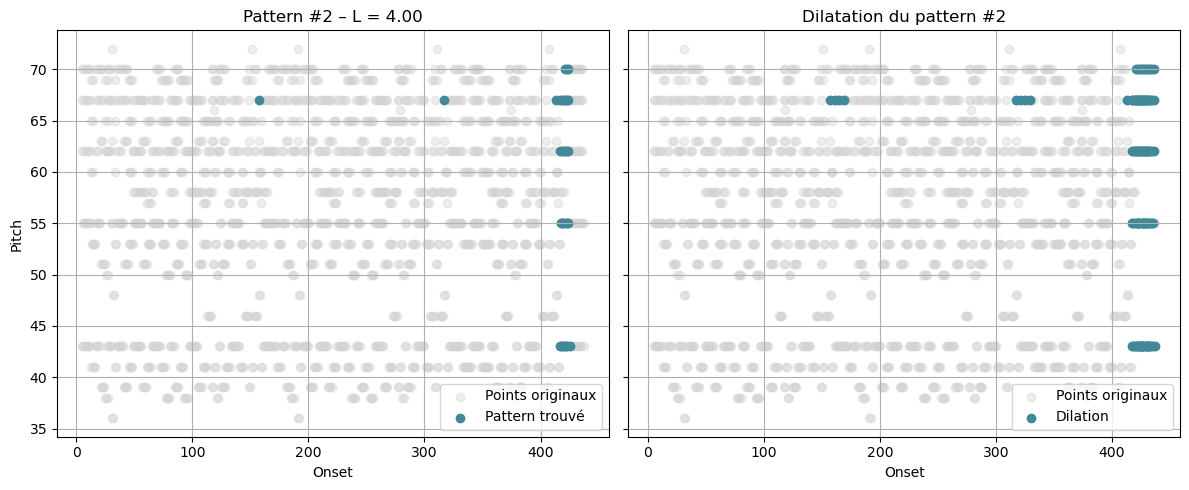

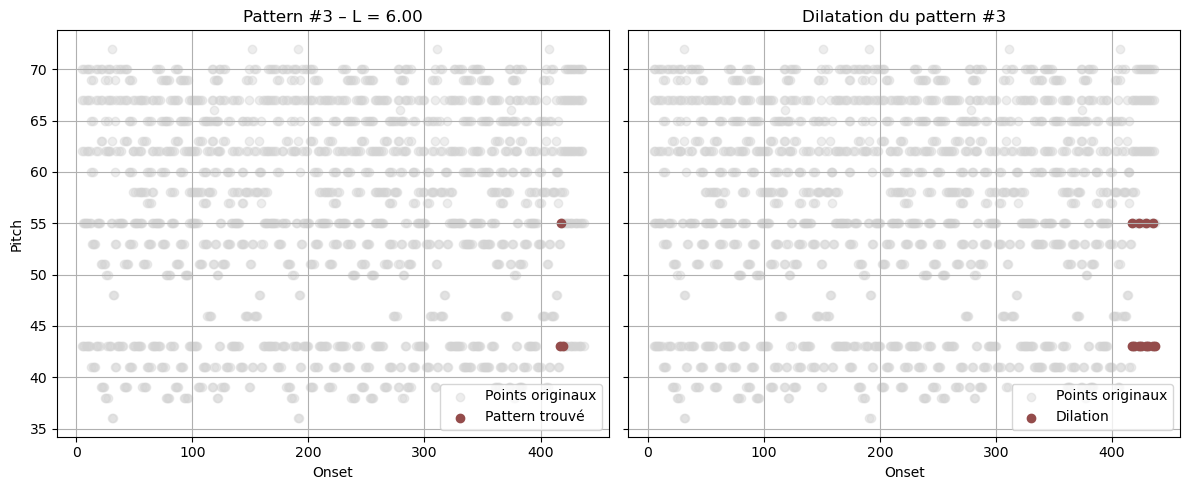

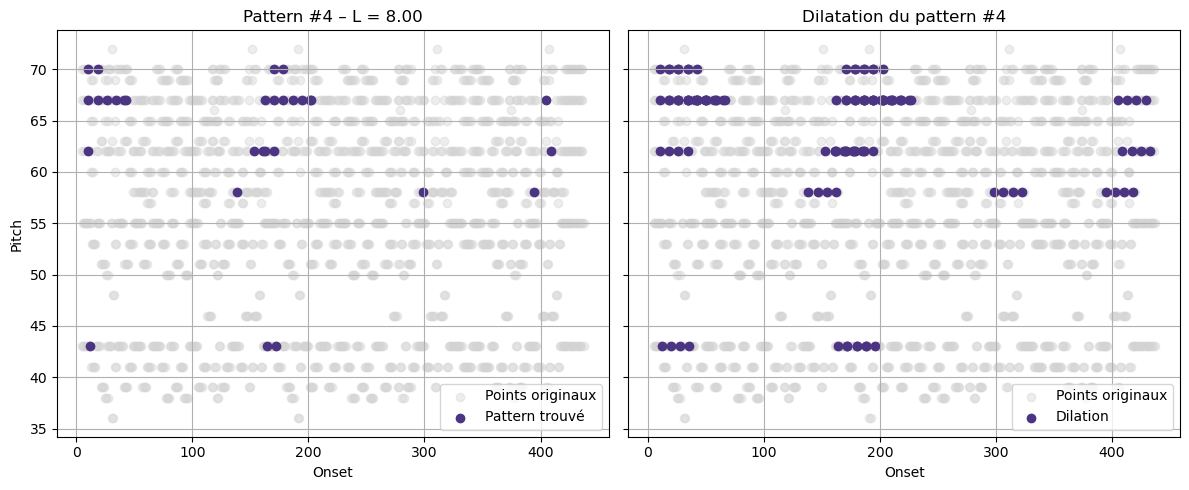

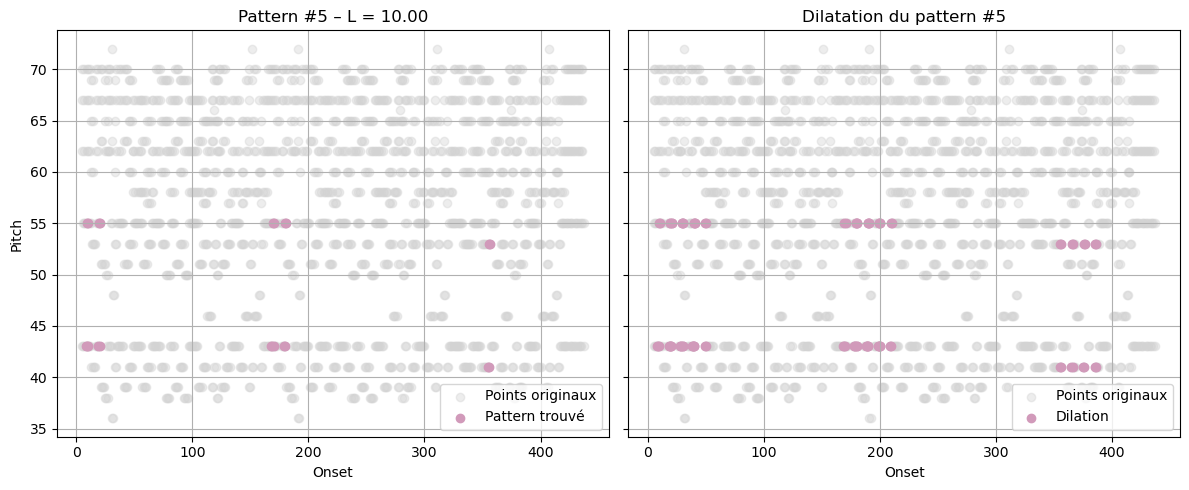

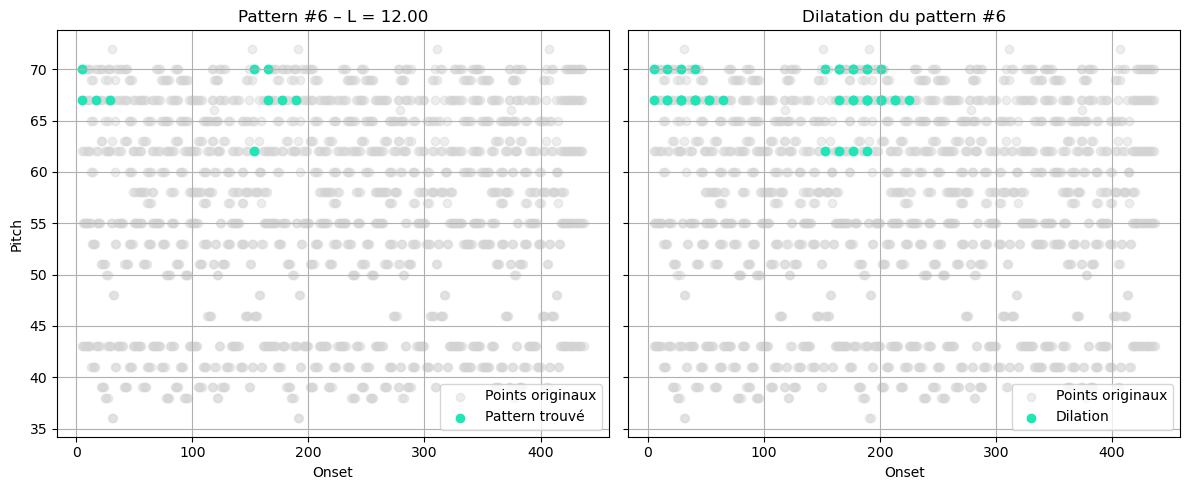

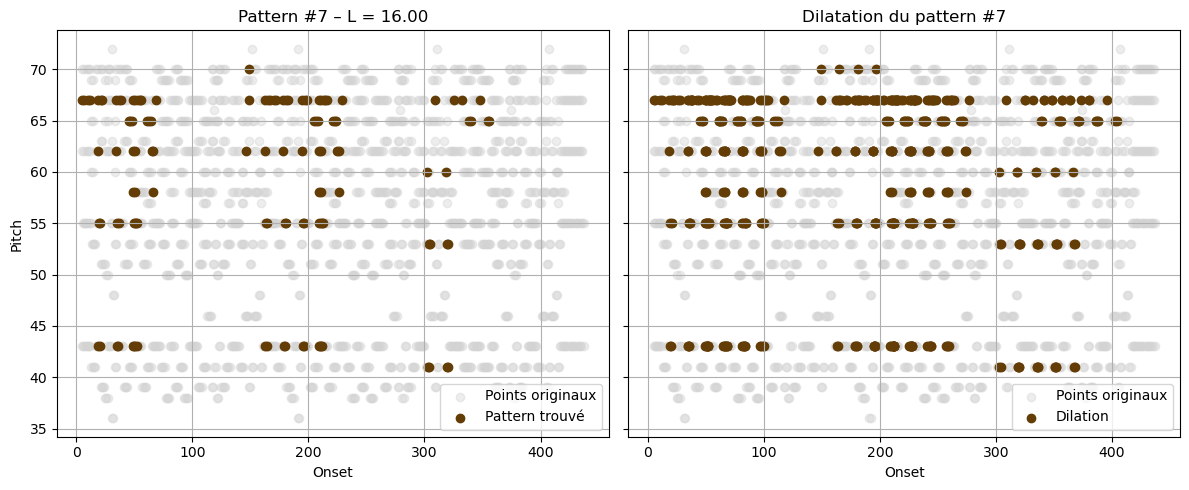

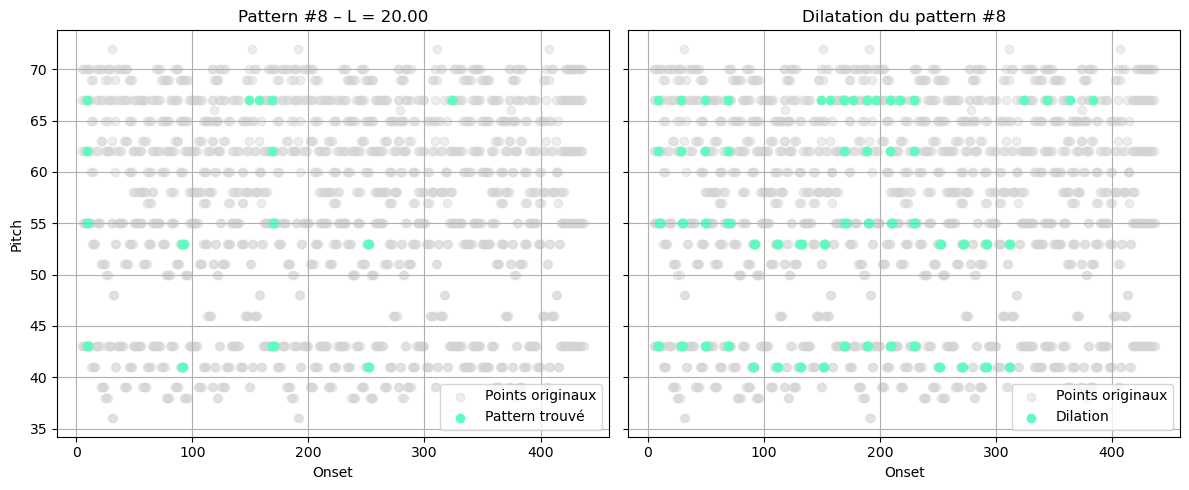

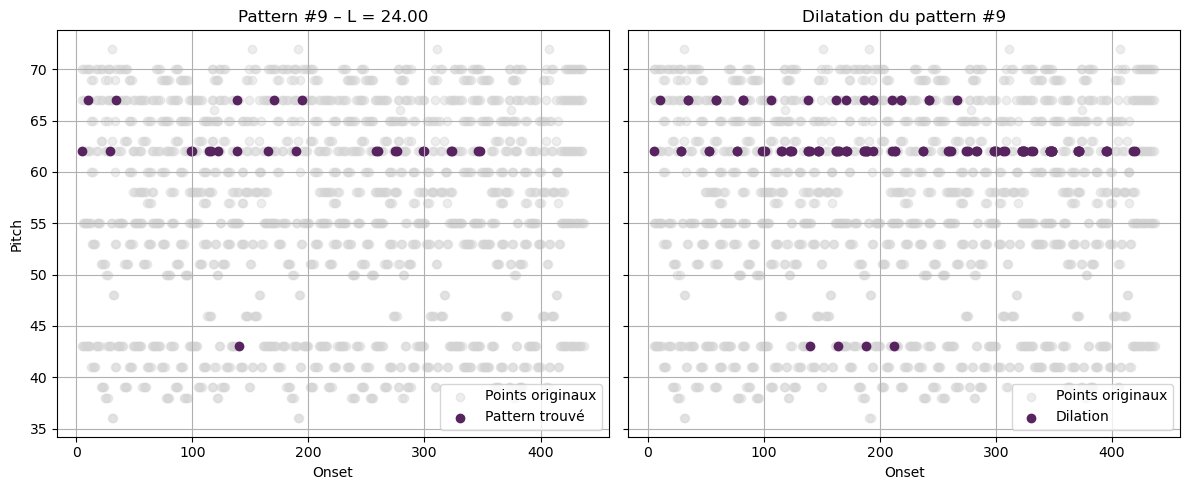

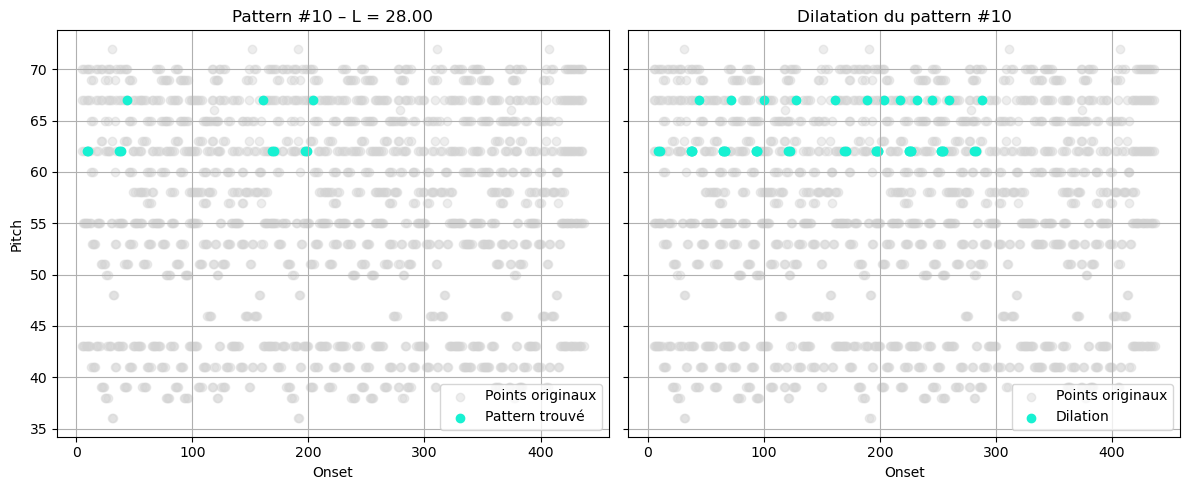

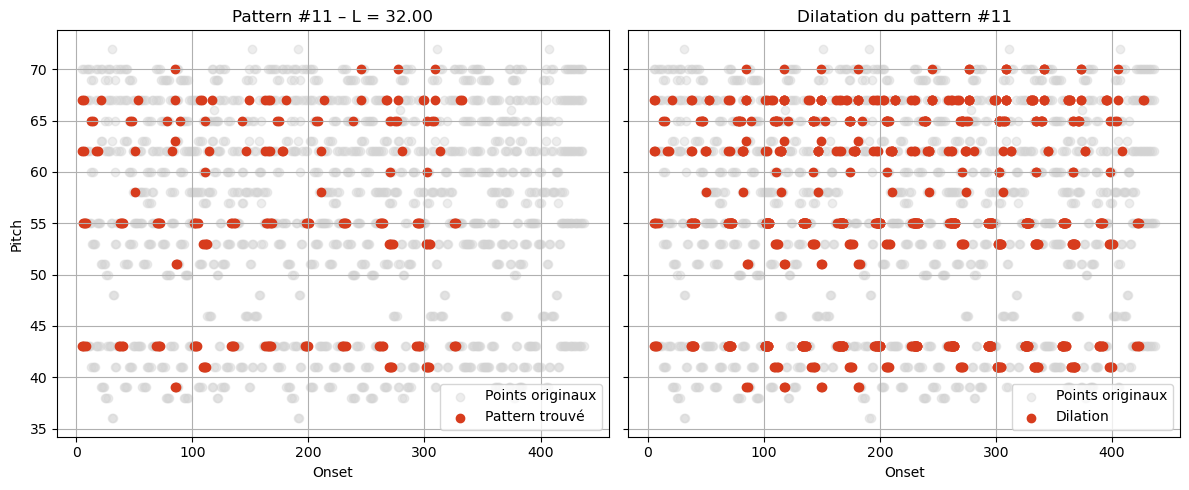

In [7]:
plot_ripda(data[test]["PIANO"], patterns)

## RIPDA bis

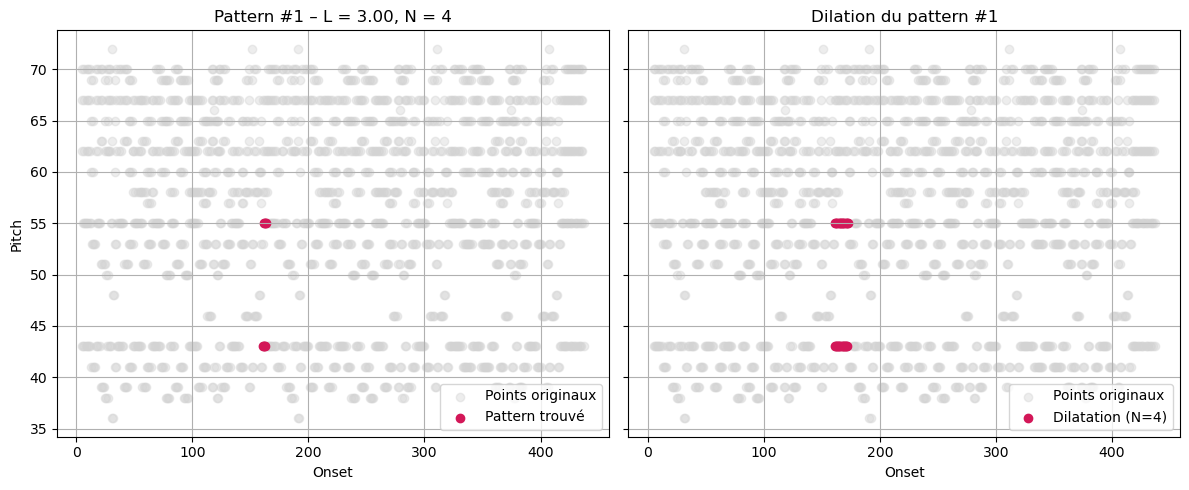

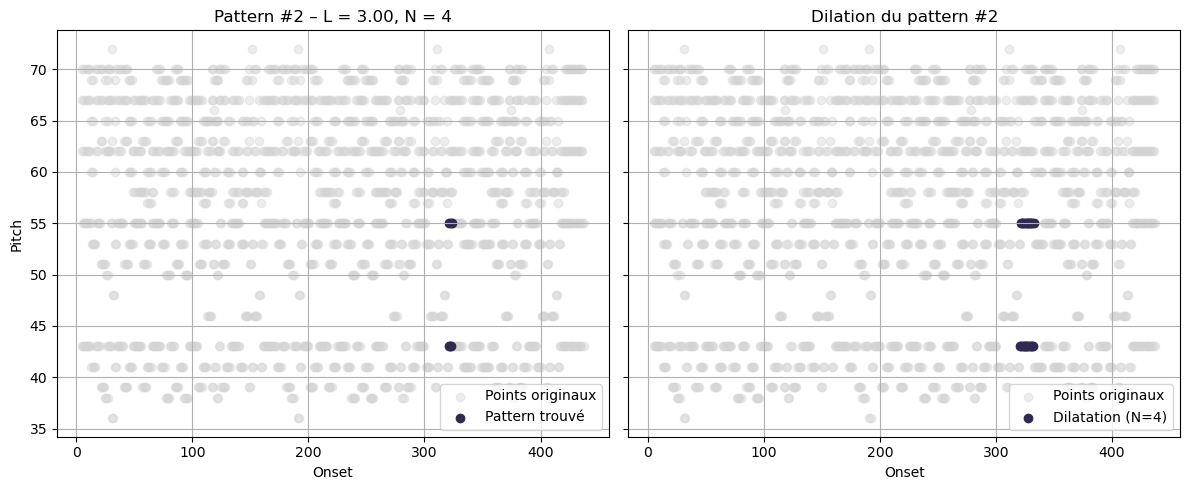

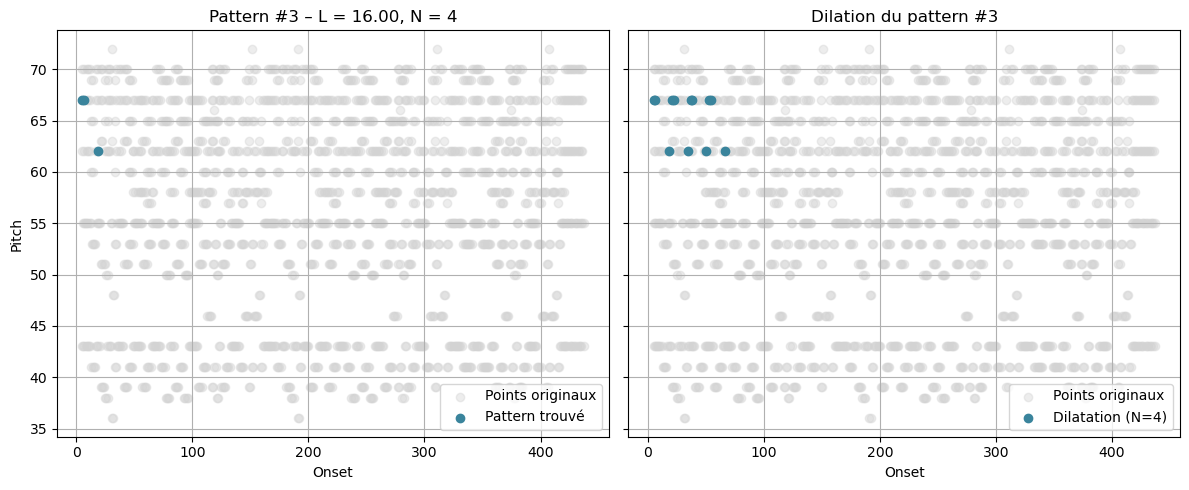

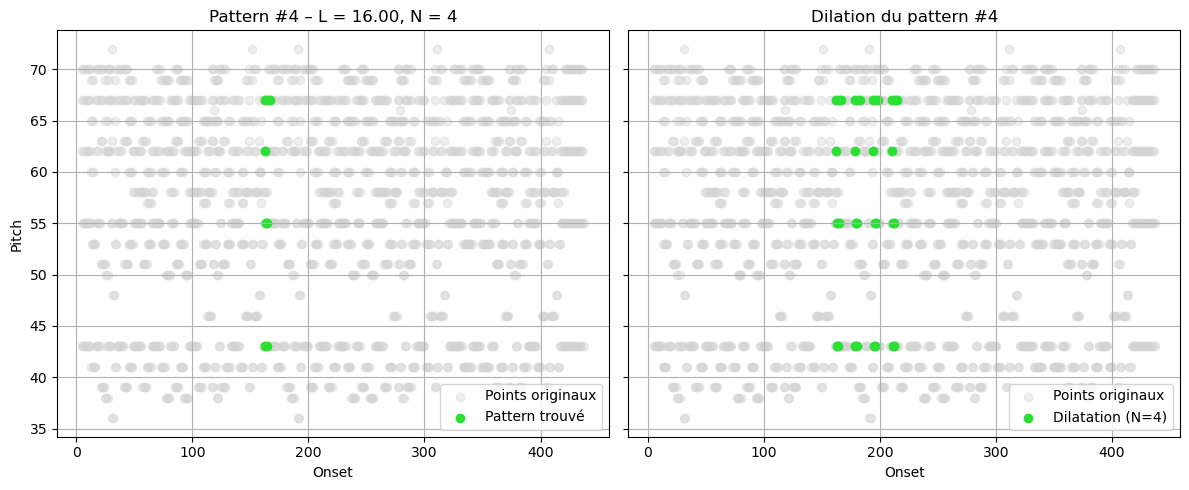

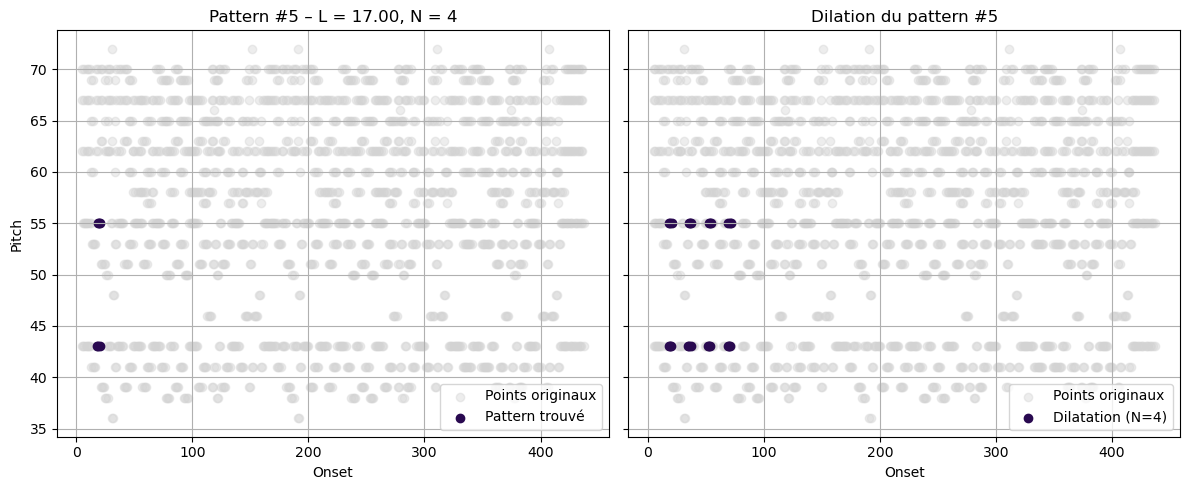

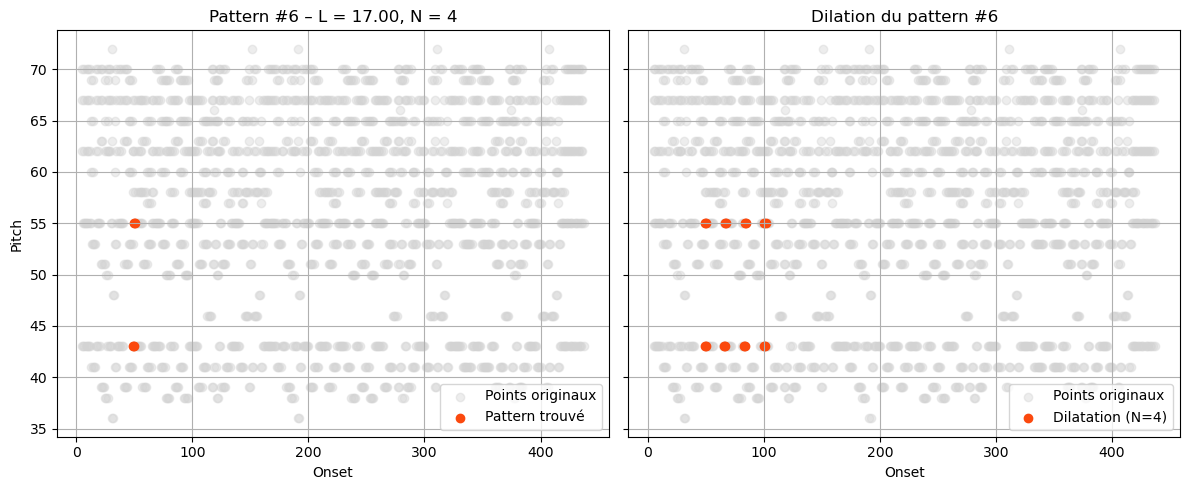

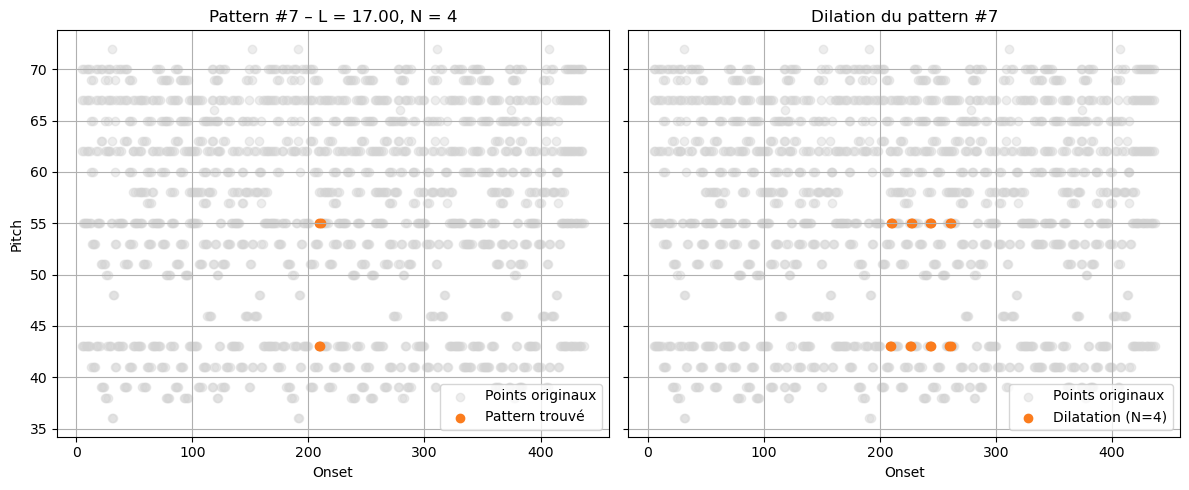

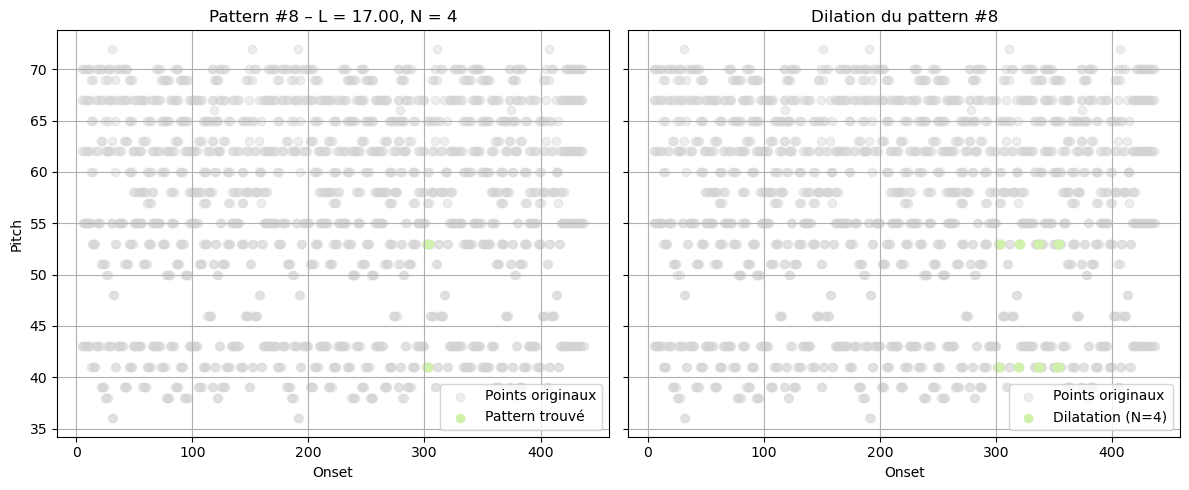

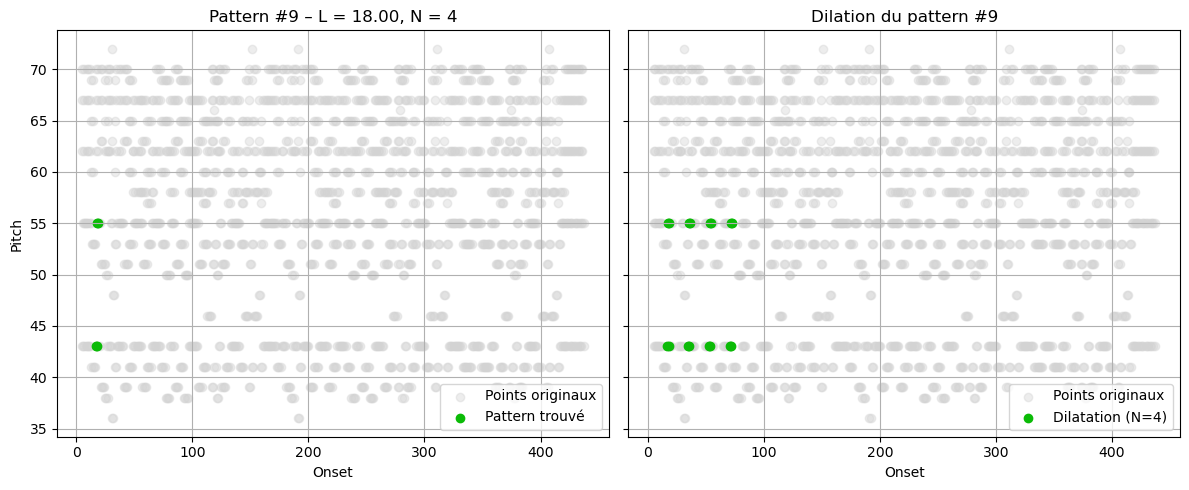

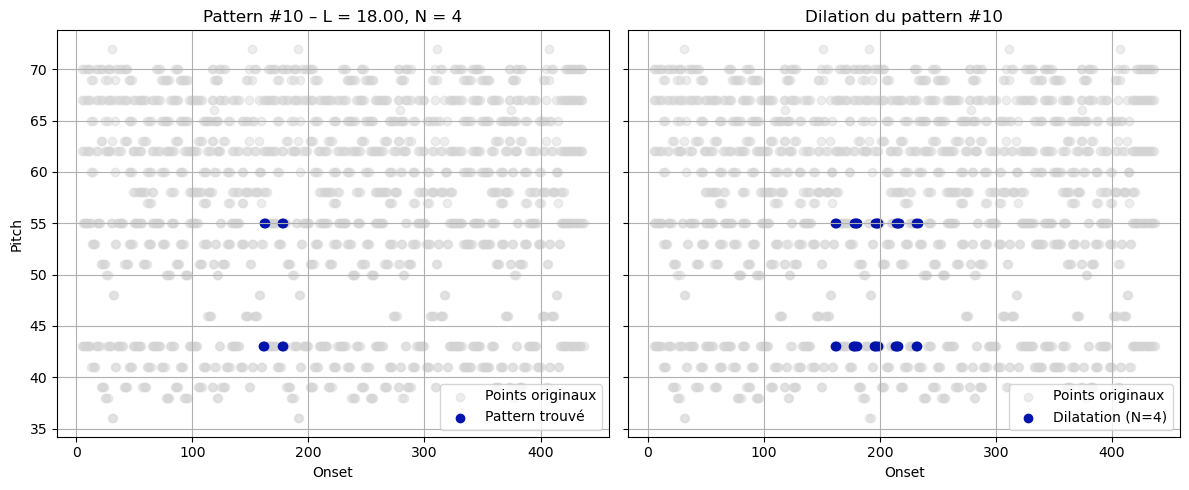

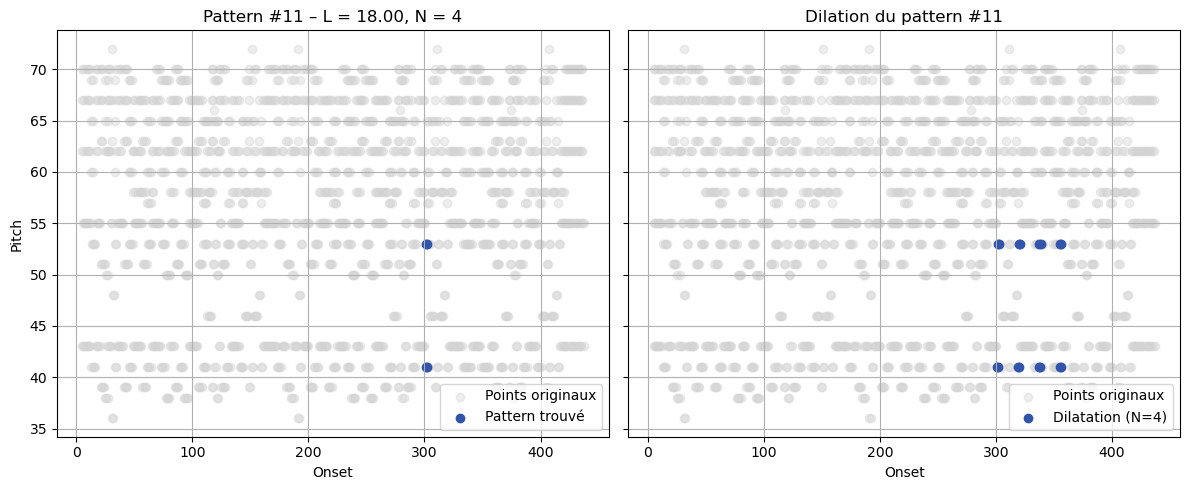

In [29]:
patterns_bis = ripda_bis(data[test]["PIANO"], step=STEP)

patterns_bis = [ele for ele in patterns_bis if len(ele[0]) > 2]

plot_ripda_bis(data[test]["PIANO"], patterns_bis)

Loading patterns...:   0%|                         | 0/187 [00:00<?, ?it/s]

Loading patterns...: 100%|███████████████| 187/187 [01:52<00:00,  1.66it/s]


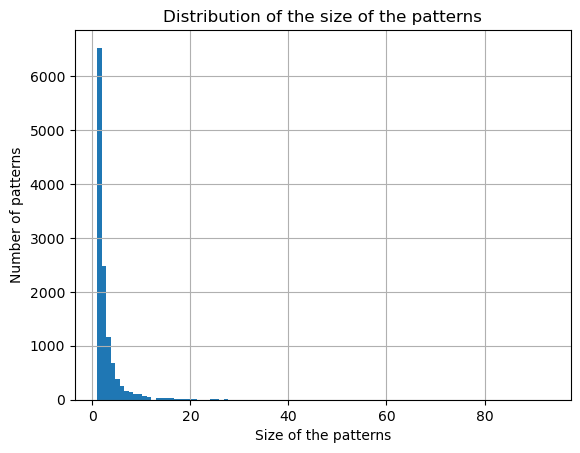

In [20]:
# patterns_size = dict()
# patterns_size.setdefault('missing_key', 0)
patterns_size = list()
for values in tqdm(data.values(), desc=f"Loading patterns...", ncols=75):
    patterns = ripda_bis(values["PIANO"], step=STEP)
    for pattern in patterns:
        patterns_size.append(len(pattern[0]))

plt.hist(patterns_size, bins=100)
plt.title("Distribution of the size of the patterns")
plt.xlabel("Size of the patterns")
plt.ylabel("Number of patterns")
plt.grid()
plt.show()

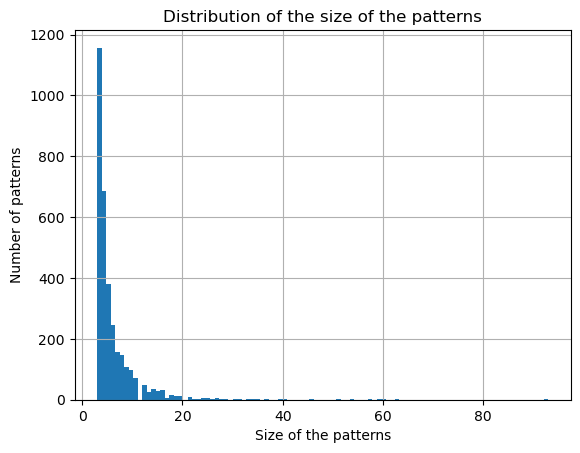

In [23]:
patterns_size_reduced = [i for i in patterns_size if i > 2]

plt.hist(patterns_size_reduced, bins=100)
plt.title("Distribution of the size of the patterns")
plt.xlabel("Size of the patterns")
plt.ylabel("Number of patterns")
plt.grid()
plt.show()